Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (2).csv
Akurasi: 0.8469387755102041
[[247   8]
 [ 37   2]]
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       255
        True       0.20      0.05      0.08        39

    accuracy                           0.85       294
   macro avg       0.53      0.51      0.50       294
weighted avg       0.78      0.85      0.81       294



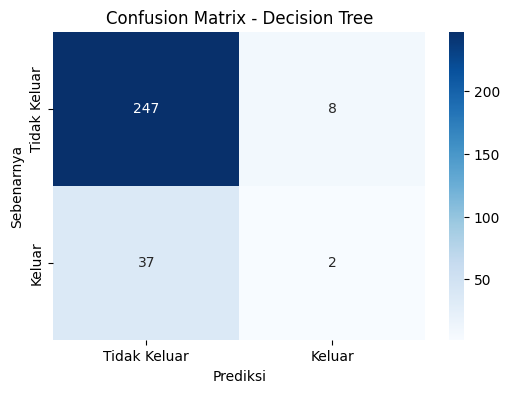

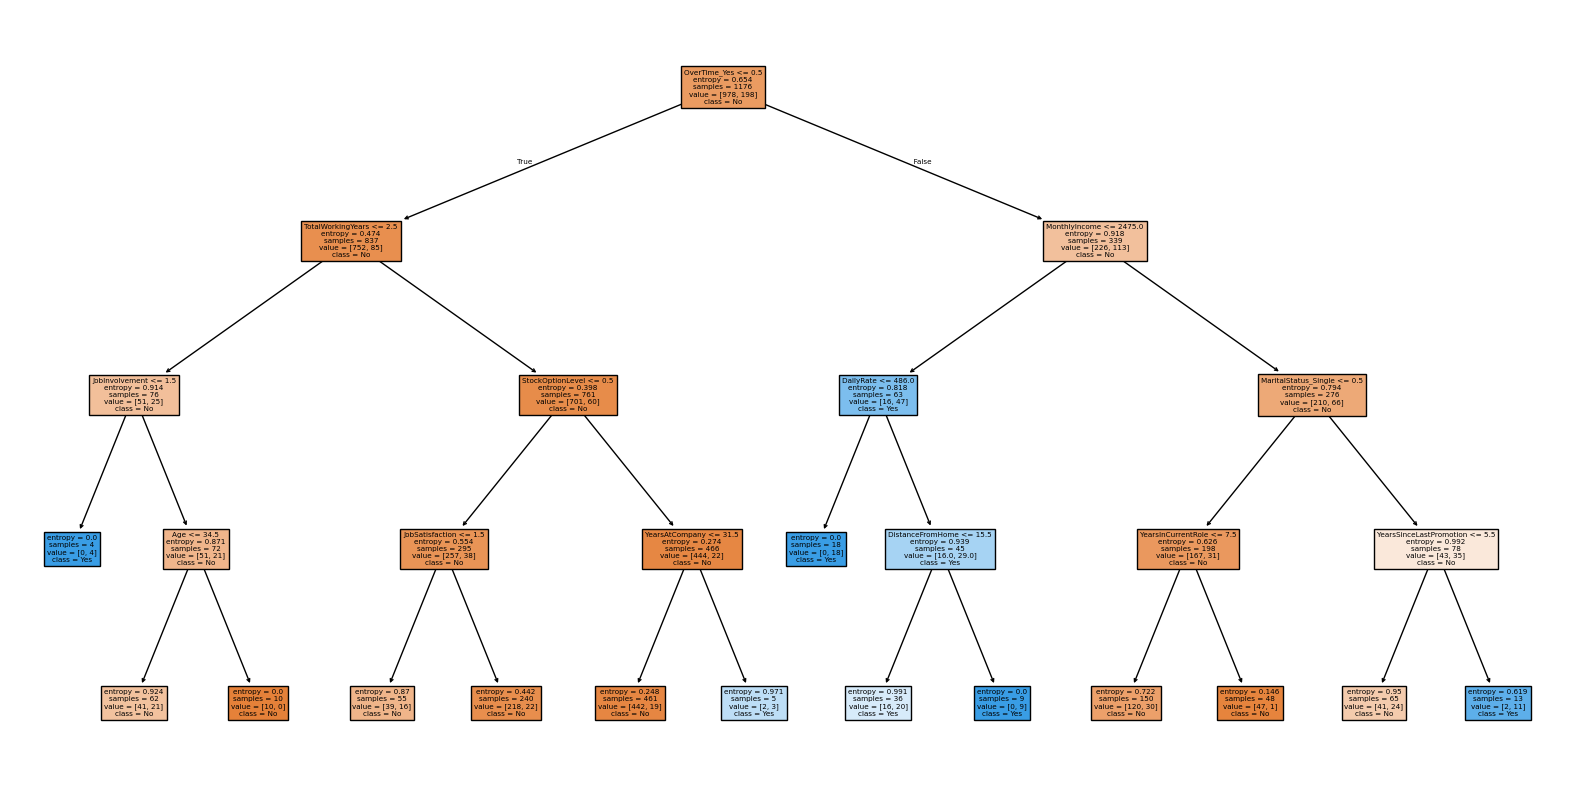

In [10]:
from google.colab import files
uploaded = files.upload()  # Pilih file CSV yang tadi kamu download

import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

# Hapus kolom tidak penting
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# Ubah kolom kategori jadi angka
df = pd.get_dummies(df, drop_first=True)

X = df.drop("Attrition_Yes", axis=1)  # fitur
y = df["Attrition_Yes"]               # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gambar confusion matrix versi heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Tidak Keluar", "Keluar"],
            yticklabels=["Tidak Keluar", "Keluar"])
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()
